In [122]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('vct_2021/agents/agents_pick_rates.csv')
df2 = pd.read_csv('vct_2022/agents/agents_pick_rates.csv')
df3 = pd.read_csv('vct_2023/agents/agents_pick_rates.csv')

### Finding the most picked agent in 2021 and comparing it to 2023

In [123]:
champ_df1 = df1.loc[(df1['Tournament'] == 'Valorant Champions 2021') & (df1['Match Type'] == 'All Match Types') & (df1['Map'] == 'All Maps')]
champ_df1 = champ_df1.sort_values('Agent')
champ_df1 = champ_df1.reset_index(drop=True)

champ_df2 = df2.loc[(df2['Tournament'] == 'Valorant Champions 2022') & (df2['Match Type'] == 'All Match Types') & (df2['Map'] == 'All Maps')]
champ_df2 = champ_df2.sort_values('Agent')
champ_df2 = champ_df2.reset_index(drop=True)

champ_df3 = df3.loc[(df3['Tournament'] == 'Valorant Champions 2023') & (df3['Match Type'] == 'All Match Types') & (df3['Map'] == 'All Maps')]
champ_df3 = champ_df3.sort_values('Agent')
champ_df3 = champ_df3.reset_index(drop=True)

In [124]:
column_name = 'Pick Rate'
all_champ_df = pd.concat([champ_df1['Agent'], champ_df1[column_name], champ_df2[column_name], champ_df3[column_name]], axis=1, keys=['Agent', '2021', '2022', '2023'])

In [125]:
all_champ_df[['2021', '2022', '2023']] = result_df[['2021', '2022', '2023']].replace('%', '', regex=True).astype(float)
all_champ_df['Mean'] = all_champ_df[['2021', '2022', '2023']].mean(axis=1)
all_champ_df = all_champ_df.sort_values('Mean', ascending=False)
all_champ_df = all_champ_df.drop(columns = 'Mean')
all_champ_df = all_champ_df.reset_index(drop = True)
all_champ_df

,Agent,2021,2022,2023
0,jett,82.0,31.0,52.0
1,viper,58.0,46.0,55.0
2,sova,68.0,33.0,26.0
3,killjoy,43.0,16.0,63.0
4,skye,43.0,21.0,56.0
5,astra,59.0,22.0,30.0
6,raze,20.0,34.0,55.0
7,kayo,18.0,45.0,19.0
8,omen,2.0,35.0,42.0
9,chamber,0.0,67.0,10.0


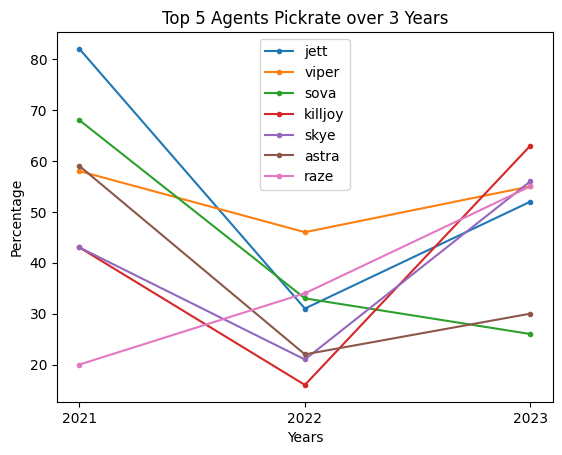

In [128]:
top_agents = all_champ_df.head(7)
for index, agent_row in top_agents.iterrows():
    plt.plot(['2021', '2022', '2023'], [agent_row['2021'], agent_row['2022'], agent_row['2023']], label=agent_row['Agent'], marker='.')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.title('Top 5 Agents Pickrate over 3 Years')
plt.legend()
plt.show()